In [1]:
import pandas as pd
import numpy as np

filename = "Automobile_clean_df.csv"

df = pd.read_csv(filename, index_col = 0)
df.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,1,0
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,1,0
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,1,0
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,1,0
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,1,0


In [2]:
# Get the numeric variables
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,1,0
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,1,0
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,1,0
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,1,0
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,1,0


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

## Functions for plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

In [8]:
y_data = df['price']

In [9]:
x_data=df.drop('price',axis=1)

In [10]:
# Split data for training and testing
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [13]:
# Let's import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression

# We create a Linear Regression object
lre=LinearRegression()

In [14]:
#we fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Let's Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.7076967079117262

In [17]:
# Let's Calculate the R^2 on the train data
lre.score(x_train[['horsepower']], y_train)

0.6450110239384648

## Cross-validation Score

In [19]:
# Lets import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

# We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [20]:
# We can calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225414 and the standard deviation is 0.29130480666118436


In [21]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

## Overfitting, Underfitting and Model Selection

In [22]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.25153792, 11236.70125955,  6436.82274615, 21891.09897761,
       16669.10119352])

In [24]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.48964574,  5914.6130239 , 11243.35261505,  6661.95904136,
       15555.94734434])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

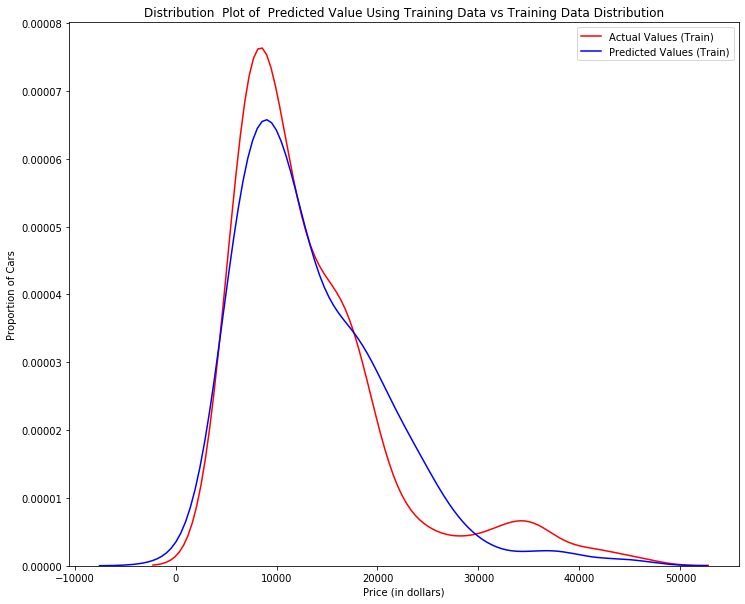

In [26]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

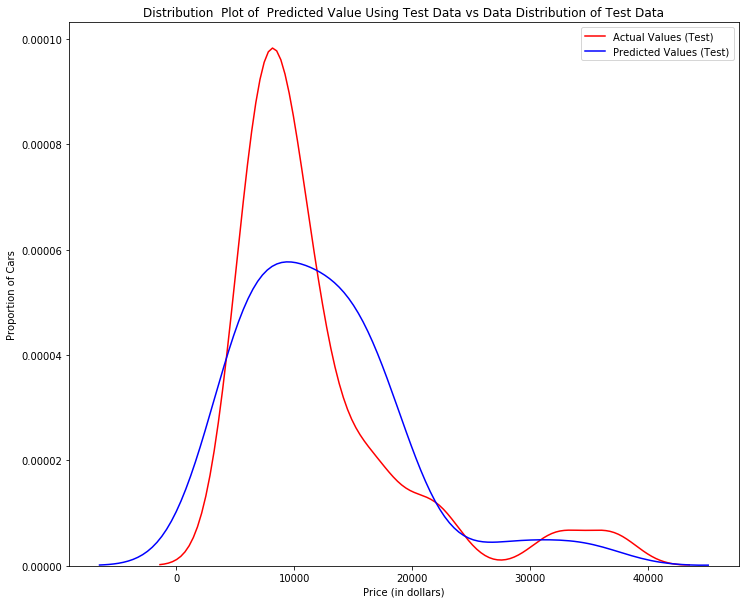

In [27]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [30]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [31]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.5684937 ,  7306.69841686, 12213.71328834, 18895.0377327 ,
       19996.83929633])

In [33]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.5684937   7306.69841686 12213.71328834 18895.0377327 ]
True values: [ 6295. 10698. 13860. 13499.]


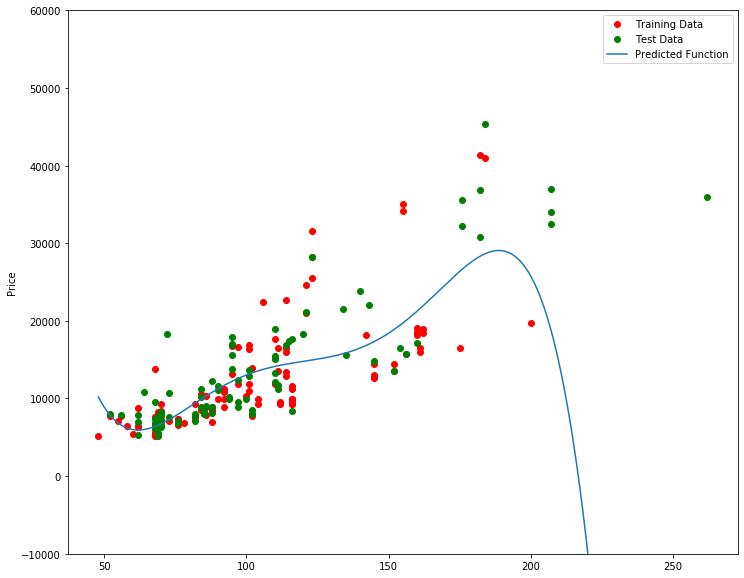

In [34]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [35]:
# poly.score(x_test_pr, y_test)
poly.score(x_train_pr, y_train)

0.5568527854053474

In [37]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.815481910638443

Text(3, 0.75, 'Maximum R^2 ')

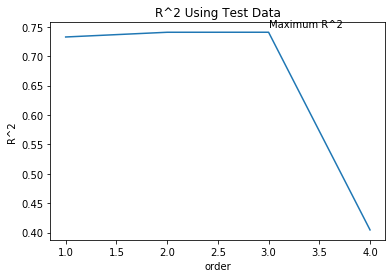

In [38]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [39]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [40]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

## Ridge regression

In [41]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [44]:
# Let's import Ridge from the module linear models
from sklearn.linear_model import Ridge

# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)


In [46]:
# Like regular regression, you can fit the model using the method fit
RigeModel.fit(x_train_pr, y_train)

# Prediction 
yhat = RigeModel.predict(x_test_pr)

C:\Users\rakande\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


In [47]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6569.10080596  9595.9695303  20834.19869602 19347.43557722]
test set : [ 6295. 10698. 13860. 13499.]


In [48]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

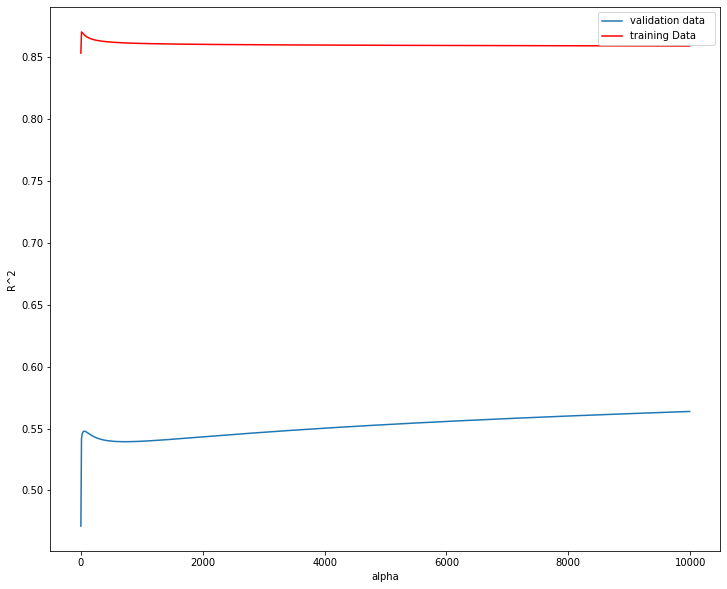

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [52]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [54]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\rakande\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793231